# **PROJECT TITLE:**
# **NAVIGATING THE NEW NORMAL :**        
**Analyzing the Impact of Remote Work on Mental Health 🌍💼**

---

### Introduction 📌

*   The COVID-19 pandemic quickly turned remote work from a luxury to a necessity, reshaping how we work. Employees had to balance **productivity with personal life**, manage **isolation**, and navigate new **mental health challenges**. 🌍

*   Today, while some return to offices, remote work has become permanent for many, creating a **hybrid work culture** that offers **flexibility** and **autonomy**. 💼 But this shift brings unique mental health implications that need attention. 🌱




### PROJECT OBJECTIVES: 🔍

1. **Spot Patterns and Trends**: Identify trends that show how remote work has impacted mental health since the start of the pandemic.
2. **Actionable Insights**: Provide evidence-based insights to help organizations implement effective mental health support for remote workers.

### WHY THIS PROJECT MATTERS:

- The mental health impacts of remote work are significant yet often invisible. Understanding these effects is crucial for organizations to create a supportive work environment and inform long-term policies.

- This project uses a structured data science pipeline—covering data collection, cleaning, modeling, and visualization—to provide actionable insights on how remote work affects mental health, guiding the development of a balanced, healthy work culture.


**1. DATA COLLECTION:  (LOAD DATASET)**


**Objective**: Load and inspect the dataset to understand its structure, identify available features, and check for any preliminary issues.

**Explanation**: Load the dataset into a DataFrame, preview the first few rows to understand its structure, and check data types, missing values, and unique values for categorical columns. Generate a statistical summary for numerical columns, then create a backup copy of the dataset for further analysis.


In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving remote_work_dataset.csv to remote_work_dataset (4).csv


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('remote_work_dataset.csv')
df.sample(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1869,EMP1870,29,Male,Marketing,Finance,4,Hybrid,42,5,4,Low,Burnout,Yes,No Change,2,Unsatisfied,3,Weekly,Good,North America
1631,EMP1632,50,Male,Sales,Finance,18,Onsite,20,2,3,High,Anxiety,Yes,Decrease,5,Satisfied,2,NaN,Poor,Europe
1585,EMP1586,54,Non-binary,Designer,Manufacturing,27,Remote,24,2,2,Medium,NaN,Yes,Decrease,5,Unsatisfied,5,Weekly,Poor,Africa
664,EMP0665,46,Prefer not to say,Marketing,Consulting,25,Onsite,36,2,1,High,Anxiety,Yes,Decrease,2,Unsatisfied,3,Daily,Poor,South America
4796,EMP4797,37,Non-binary,Project Manager,IT,3,Remote,51,1,4,Low,Depression,No,Decrease,4,Neutral,3,NaN,Poor,Asia
1374,EMP1375,42,Non-binary,Software Engineer,Manufacturing,25,Onsite,54,15,3,Low,NaN,Yes,No Change,3,Satisfied,4,Daily,Good,South America
2317,EMP2318,39,Male,Project Manager,Consulting,23,Hybrid,30,14,2,Medium,Anxiety,Yes,No Change,2,Unsatisfied,2,Daily,Poor,Asia
3500,EMP3501,42,Female,Software Engineer,IT,18,Remote,47,3,1,Medium,NaN,No,Increase,2,Satisfied,5,Daily,Poor,Europe
1982,EMP1983,34,Non-binary,Designer,Manufacturing,32,Hybrid,59,14,5,Medium,Depression,No,Decrease,4,Satisfied,2,Daily,Good,South America
454,EMP0455,51,Non-binary,Data Scientist,Manufacturing,2,Remote,58,14,3,Low,Depression,No,Decrease,4,Satisfied,4,NaN,Average,Asia


In [ ]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-nul

In [ ]:
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())


Statistical Summary of Numerical Columns:
               Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000              

In [ ]:
print("\nUnique Values in Each Column:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} unique values")

data = df.copy()


Unique Values in Each Column:
Employee_ID: 5000 unique values
Gender: 4 unique values
Job_Role: 7 unique values
Industry: 7 unique values
Work_Location: 3 unique values
Stress_Level: 3 unique values
Mental_Health_Condition: 3 unique values
Access_to_Mental_Health_Resources: 2 unique values
Productivity_Change: 3 unique values
Satisfaction_with_Remote_Work: 3 unique values
Physical_Activity: 2 unique values
Sleep_Quality: 3 unique values
Region: 6 unique values


In [ ]:
data.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [ ]:
data.shape

(5000, 20)

In [ ]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [ ]:
# Count the occurrences of each job role
job_role_counts = data['Job_Role'].value_counts()

print("Number of people in each job role:")
print(job_role_counts)

Number of people in each job role:
Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64


**POSSIBLE QUESTIONS:**

**1.What does the df.sample(10) function do?**

**A:** It randomly selects and displays 10 rows from the dataset, which helps to get a quick overview of the data and assess its contents.

**2.Why inspect data types?**

**A:** Data types indicate how features can be processed. Numerical data can be transformed, normalized, or used in modeling, while categorical data might require encoding.




**2. DATA CLEANING:**

**Objective**: focus on removing any irrelevant data, fixing data inconsistencies, and ensuring the dataset is as accurate as possible.

**Explanation**: Remove duplicates, correct inconsistent entries in categorical columns, and address any invalid data that doesn’t meet logical expectations. Remove irrelevant columns and display the cleaned data to verify there are no remaining issues.

In [ ]:
print("Number of duplicate rows before cleaning:", df.duplicated().sum())

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [ ]:
print("\nUnique values in each categorical column:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")


Unique values in each categorical column:
Employee_ID: ['EMP0001' 'EMP0002' 'EMP0003' ... 'EMP4998' 'EMP4999' 'EMP5000']
Gender: ['Non-binary' 'Female' 'Male' 'Prefer not to say']
Job_Role: ['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']
Industry: ['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']
Work_Location: ['Hybrid' 'Remote' 'Onsite']
Stress_Level: ['Medium' 'High' 'Low']
Mental_Health_Condition: ['Depression' 'Anxiety' nan 'Burnout']
Access_to_Mental_Health_Resources: ['No' 'Yes']
Productivity_Change: ['Decrease' 'Increase' 'No Change']
Satisfaction_with_Remote_Work: ['Unsatisfied' 'Satisfied' 'Neutral']
Physical_Activity: ['Weekly' nan 'Daily']
Sleep_Quality: ['Good' 'Poor' 'Average']
Region: ['Europe' 'Asia' 'North America' 'South America' 'Oceania' 'Africa']


In [ ]:
print("\nFirst 5 rows after data cleaning:")
print(df.head())

# Check for any remaining inconsistencies
print("\nData types and non-null counts after cleaning:")
df.info()

cleaned_data = df.copy()



First 5 rows after data cleaning:
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                      

**3. DATA PREPARATION:**

**Objective**: involves tasks like handling missing values, renaming columns for clarity if necessary, and ensuring consistent data formats.

**Explanation**: Handle missing values by filling them with the median for numerical columns or the mode for categorical ones. Standardize categorical text to lowercase and rename columns to lowercase with underscores. Verify the absence of remaining missing values and display the prepared data.

In [ ]:
# Handling Missing Values

print("Missing values in each column before handling:")
print(df.isnull().sum())

Missing values in each column before handling:
Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [ ]:
# For numerical columns, fill with  median
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

# For categorical columns, fill with the mode
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-14-dda7d6515245>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
# Consistent Formatting
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# standardize column names by making them lowercase and replacing spaces with underscores
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

print(df.head())

  employee_id  age      gender           job_role    industry  \
0     emp0001   32  non-binary                 hr  healthcare   
1     emp0002   40      female     data scientist          it   
2     emp0003   59  non-binary  software engineer   education   
3     emp0004   27        male  software engineer     finance   
4     emp0005   49        male              sales  consulting   

   years_of_experience work_location  hours_worked_per_week  \
0                   13        hybrid                     47   
1                    3        remote                     52   
2                   22        hybrid                     46   
3                   20        onsite                     32   
4                   32        onsite                     35   

   number_of_virtual_meetings  work_life_balance_rating stress_level  \
0                           7                         2       medium   
1                           4                         1       medium   
2             

In [ ]:
# Verify Data Preparation

print("\nMissing values in each column after handling:")
print(df.isnull().sum())

print("\nFirst 5 rows after data preparation:")
print(df.head())

prepared_data = df.copy()


Missing values in each column after handling:
employee_id                          0
age                                  0
gender                               0
job_role                             0
industry                             0
years_of_experience                  0
work_location                        0
hours_worked_per_week                0
number_of_virtual_meetings           0
work_life_balance_rating             0
stress_level                         0
mental_health_condition              0
access_to_mental_health_resources    0
productivity_change                  0
social_isolation_rating              0
satisfaction_with_remote_work        0
company_support_for_remote_work      0
physical_activity                    0
sleep_quality                        0
region                               0
dtype: int64

First 5 rows after data preparation:
  employee_id  age      gender           job_role    industry  \
0     emp0001   32  non-binary                 hr  health

**POSSIBLE QUESTIONS:**

1. **Why did you choose to fill missing values in numerical columns with the median?**  
   **A**: The median is less influenced by outliers than the mean, making it a robust option for filling skewed data.

2. **Why do you use mode for filling categorical columns?**  
   **A**: The mode is the most common value, which helps maintain consistency in categorical data.

3. **What are the potential issues if missing values in numerical columns were filled with zeros instead of the median?**  
   **A**: Filling with zeros can introduce bias and distort the data distribution if zero is not representative.

**4. DATA TRANSFORMATION:**

**Objective**: involves converting data into a suitable format for analysis. This may include encoding categorical variables, creating new features, or transforming variables to enhance model performance or interpretability.

**Explanation**: Encode categorical variables using Label Encoding and one hot encoding to convert them into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

# Use Label Encoding for columns with few unique categories
label_encoder = LabelEncoder()
label_encoded_cols = ['gender', 'work_location', 'stress_level', 'access_to_mental_health_resources',
                      'productivity_change', 'satisfaction_with_remote_work', 'sleep_quality', 'region']

for column in label_encoded_cols:
    if column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])

# Use One-Hot Encoding for columns with more unique categories
one_hot_encoded_cols = ['job_role', 'industry']

df = pd.get_dummies(df, columns=one_hot_encoded_cols, drop_first=True)

print("\nTransformed Dataset Preview:")
print(df.head())

transformed_data = df.copy()



Transformed Dataset Preview:
  employee_id  age  gender  years_of_experience  work_location  \
0     emp0001   32       2                   13              0   
1     emp0002   40       0                    3              2   
2     emp0003   59       2                   22              0   
3     emp0004   27       1                   20              1   
4     emp0005   49       1                   32              1   

   hours_worked_per_week  number_of_virtual_meetings  \
0                     47                           7   
1                     52                           4   
2                     46                          11   
3                     32                           8   
4                     35                          12   

   work_life_balance_rating  stress_level mental_health_condition  ...  \
0                         2             2              depression  ...   
1                         1             2                 anxiety  ...   
2             

**POSSIBLE QUESTIONS:**

1.**Why did you choose Label Encoding for certain columns?**  
   **A**: Label Encoding is efficient for columns with few unique categories, converting them to numeric values while preserving any ordinal relationships.

2.**Why did you use One-Hot Encoding for columns like 'Job_Role' and 'Industry'?**  
   **A**: One-Hot Encoding handles columns with more unique categories, preventing false ordinal relationships and representing data in a purely categorical form.

**5. DATA NORMALIZATION**

**Objective**:  scale numerical features to a standard range, improving the performance and convergence of machine learning algorithms. It ensures that no feature dominates others due to differing scales.

**Explanation**: Standardize numerical columns using StandardScaler to ensure comparable scales for analysis or machine learning models.


In [ ]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nTransformed Dataset Preview:")
print(df.head())

normalized_data = df.copy()


Transformed Dataset Preview:
  employee_id       age    gender  years_of_experience  work_location  \
0     emp0001 -0.796378  0.459676            -0.480088      -1.235337   
1     emp0002 -0.088093 -1.324781            -1.478151       1.203631   
2     emp0003  1.594083  0.459676             0.418168      -1.235337   
3     emp0004 -1.239056 -0.432552             0.218556      -0.015853   
4     emp0005  0.708727 -0.432552             1.416231      -0.015853   

   hours_worked_per_week  number_of_virtual_meetings  \
0               0.622767                   -0.120587   
1               1.044388                   -0.767744   
2               0.538443                    0.742290   
3              -0.642094                    0.095132   
4              -0.389122                    0.958009   

   work_life_balance_rating  stress_level mental_health_condition  ...  \
0                 -0.697830      1.224945              depression  ...   
1                 -1.406862      1.224945     

**POSSIBLE QUESTIONS:**

**1. What is the purpose of using StandardScaler in this code?**

**A:** The purpose of using StandardScaler is to standardize the numerical features, transforming them to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model, especially in algorithms sensitive to feature scales.


**6. DATA DISCRETIZATION:**

In [ ]:
# Define the number of bins for discretization
num_bins = 4

columns_to_discretize = ['age', 'years_of_experience']

for column in columns_to_discretize:
    df[column + '_binned'] = pd.cut(df[column], bins=num_bins, labels=False)

# Verify discretization
print("\nDataset with Discretized Columns Preview:")

# Displaying only discretized columns
print(df[[col for col in df.columns if 'binned' in col]].head())

discretized_data = df.copy()



Dataset with Discretized Columns Preview:
   age_binned  years_of_experience_binned
0           1                           1
1           1                           0
2           3                           2
3           0                           2
4           2                           3


**POSSIBLE QUESTIONS:**

**1.What does pd.cut() do in this code?**

**A:** pd.cut() splits a continuous variable into discrete bins and assigns each data point to a bin. In this code, it divides the specified columns into 4 equal-width intervals.

**2. What are the benefits of discretizing continuous variables?**

**A:** Discretization can simplify analysis, make data more interpretable, reduce the impact of outliers, and enhance the performance of the model.


**7. DIMENSIONALITY REDUCTION:**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaled_data = StandardScaler().fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Apply PCA -  retain 95% of the variance
pca = PCA(n_components=0.95)
pca_transformed_data = pca.fit_transform(scaled_data)

# DataFrame for the transformed data
pca_df = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(pca_transformed_data.shape[1])])

print("Explained Variance Ratio by PCA Components:")
print(pca.explained_variance_ratio_)

print("\nPCA Transformed Data Preview:")
print(pca_df.head())


Explained Variance Ratio by PCA Components:
[0.11695507 0.11527094 0.06363972 0.06277787 0.06104311 0.06079055
 0.06045732 0.06003602 0.05859505 0.05790544 0.05740844 0.05674316
 0.0559833  0.05470206 0.05396597]

PCA Transformed Data Preview:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.067977 -1.138220 -0.796007  0.163517 -1.784918  1.330204 -1.891704   
1  1.085185 -1.882238 -1.151855 -0.876291  0.555121  1.288262 -0.426367   
2  1.138684  1.941195 -0.706342 -0.199160 -1.052742  0.861945  1.486910   
3 -1.674736 -0.846068  0.077925  1.662061 -0.053275 -0.891901 -0.122841   
4 -0.809367  1.954285 -0.272373  0.846663  0.697098 -0.947109 -0.174043   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.424180  0.251428 -0.691539  0.994769 -0.187611 -0.984457  0.397179   
1 -0.677367 -0.452700 -0.344517  1.886499 -0.303332  1.078072 -0.329083   
2 -0.641914  2.049727  0.527642 -0.798699  1.596884 -0.760189 -0.043656   
3  0.

**POSSIBLE QUESTIONS:**

**1.What does n_components=0.95 mean in PCA?**

**A:** It specifies that PCA should select the number of principal components that retain 95% of the total variance in the dataset.

**2. What does the explained variance ratio tell you?**

**A:** It shows the proportion of the dataset's total variance captured by each principal component, helping you understand how much information each component retains.

**3.What are principal components?**

**A:** Principal components are new, uncorrelated variables created from linear combinations of the original features, arranged to maximize variance and decrease dimensionality.


**8. OUTLIER DETECTION:**

In [ ]:
# Outlier detection using the IQR method - Interquartile Range
Q1 = pca_df.quantile(0.25)
Q3 = pca_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR
outliers = ((pca_df < (Q1 - 1.5 * IQR)) | (pca_df > (Q3 + 1.5 * IQR)))

# Display the outlier flags
print("\nOutlier Flags (True indicates an outlier):")
print(outliers.head())

# Count the number of outliers in each principal component
outlier_counts = outliers.sum()
print("\nNumber of Outliers in Each Principal Component:")
print(outlier_counts)


Outlier Flags (True indicates an outlier):
     PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

    PC11   PC12   PC13   PC14   PC15  
0  False  False  False  False  False  
1  False  False  False  False  False  
2  False  False  False  False  False  
3  False  False  False  False  False  
4  False  False  False  False  False  

Number of Outliers in Each Principal Component:
PC1      0
PC2      0
PC3     27
PC4     25
PC5     18
PC6     16
PC7     18
PC8     20
PC9      9
PC10    12
PC11    10
PC12    14
PC13    12
PC14    12
PC15    14
dtype: int64


In [ ]:
pca_df.shape

(5000, 15)

**POSSIBLE QUESTIONS:**

**1.What is the IQR method for detecting outliers?**

**A:** The IQR method defines outliers as values that fall outside 1.5 times the interquartile range below the first quartile or above the third quartile. It is a non-parametric method that is effective for identifying extreme values in the data.

**10.VISUALIZATIONS (DISTRIBUTION ANALYSIS):**

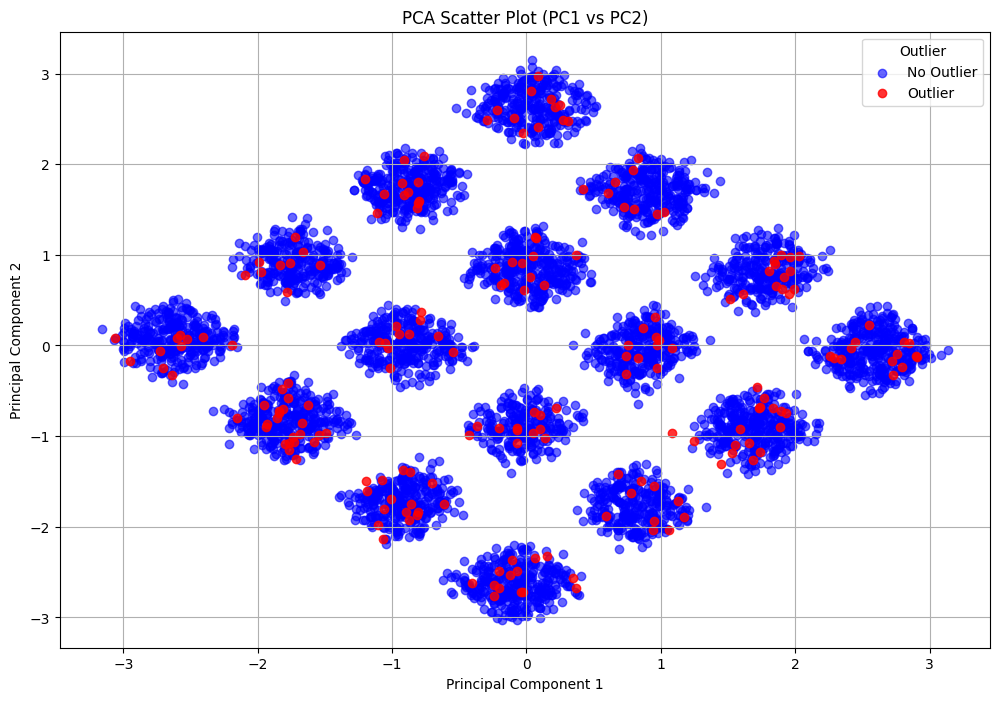

In [ ]:
# outliers and non-outliers distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Separate data into outliers and non-outliers
outliers_mask = outliers.any(axis=1)
pca_outliers = pca_df[outliers_mask]
pca_non_outliers = pca_df[~outliers_mask]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(pca_non_outliers['PC1'], pca_non_outliers['PC2'], color='blue', label='No Outlier', alpha=0.6)
plt.scatter(pca_outliers['PC1'], pca_outliers['PC2'], color='red', label='Outlier', alpha=0.8)

# Adding plot details
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outlier')
plt.grid(True)

plt.show()


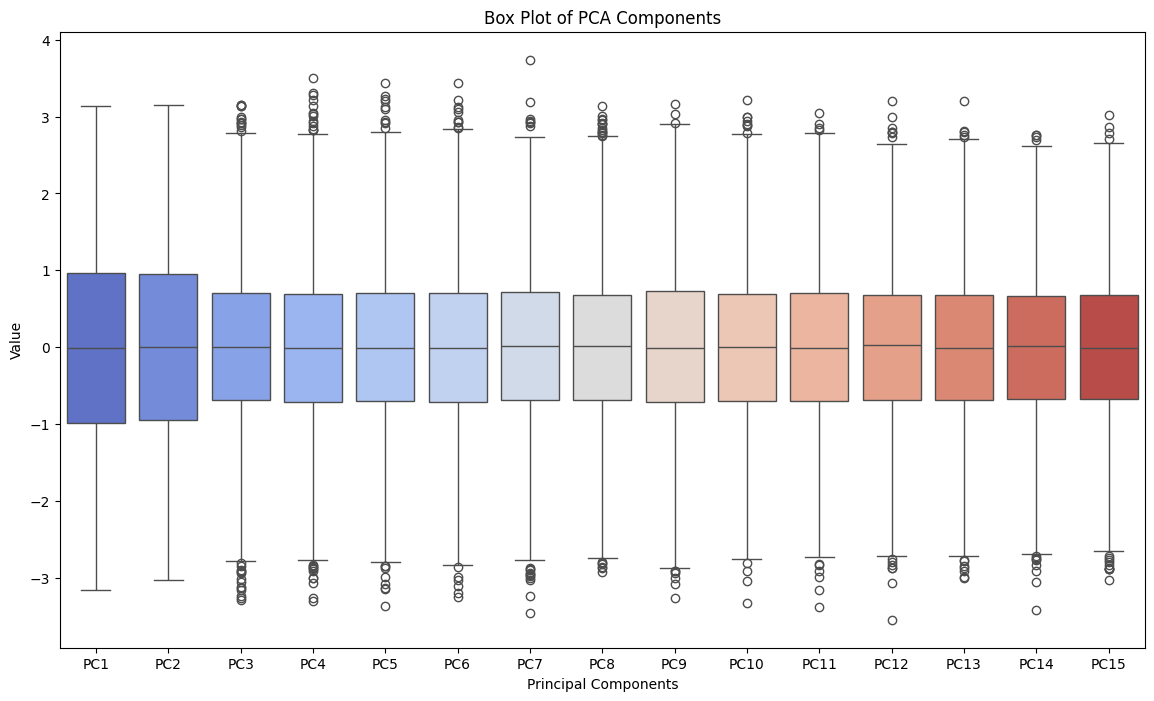

In [ ]:
# Box Plot for Outlier Analysis

# Box plot to show potential outliers in each principal component
plt.figure(figsize=(14, 8))
sns.boxplot(data=pca_df, palette='coolwarm')
plt.title('Box Plot of PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Value')
plt.show()

Explanation of the Box Plot:


*   The median (the center line inside each box)
*   The interquartile range (IQR) (the box representing the range between the 25th and 75th percentiles)
*   Outliers: Data points outside the "whiskers" (the lines extending from the box) are considered potential outliers


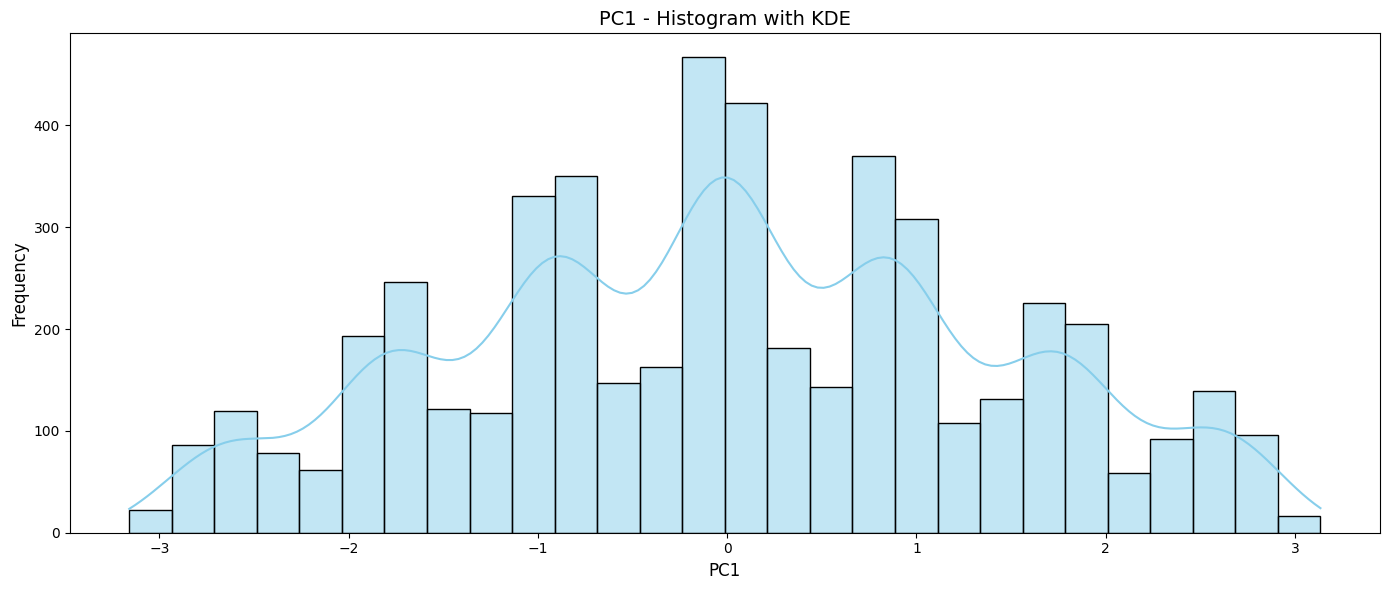

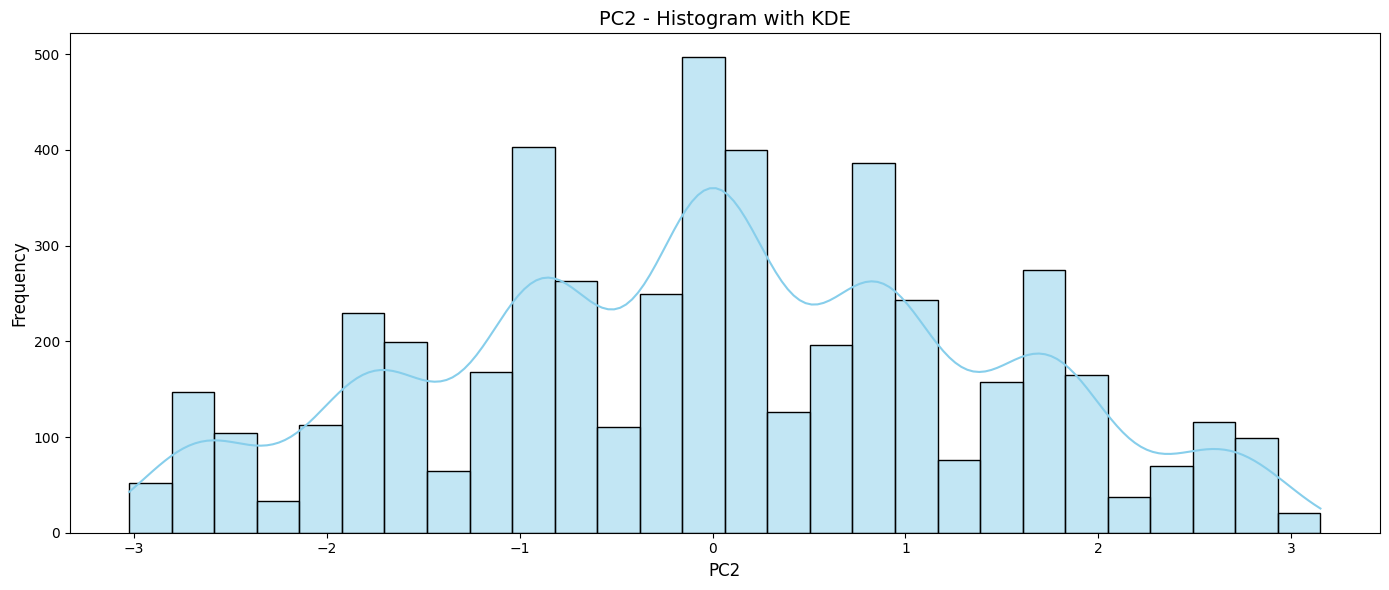

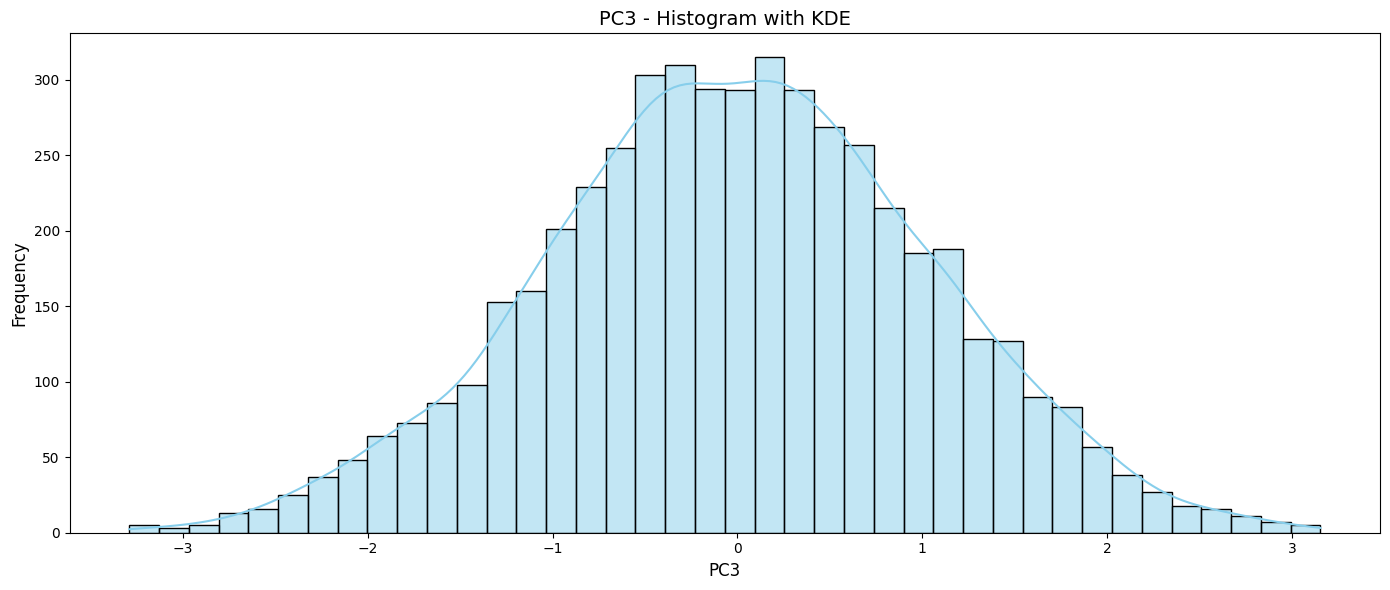

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

components_to_visualize = ['PC1', 'PC2', 'PC3']

for component in components_to_visualize:
    if component in pca_df.columns:
        plt.figure(figsize=(14, 6))

        # Convert to 1D numpy array for consistent plotting
        data_array = pca_df[component].values.flatten()

        # Histogram with kernel density estimate
        sns.histplot(data_array, kde=True, color='skyblue')
        plt.title(f'{component} - Histogram with KDE', fontsize=14)
        plt.xlabel(component, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        # Show the plot
        plt.tight_layout()
        plt.show()
    else:
        print(f"Component '{component}' not found in the PCA DataFrame.")


<ipython-input-26-1dcbfe5e9b9e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette=colors)


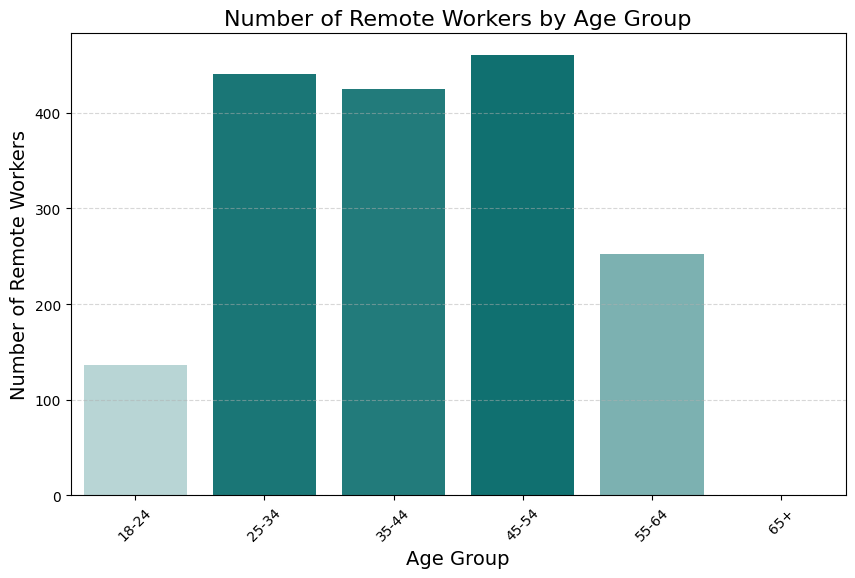

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define age bins and labels for age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filter data to include only remote workers and count the number of remote workers in each age group
remote_work_counts = data[data['Work_Location'] == 'Remote']['Age_Group'].value_counts().sort_index()

# Normalize the counts for color intensity scaling
normalized_counts = (remote_work_counts - remote_work_counts.min()) / (remote_work_counts.max() - remote_work_counts.min())

base_color = np.array([0, 128, 128])
colors = [
    (base_color + (255 - base_color) * (1 - norm)) / 255
    for norm in normalized_counts
]

plt.figure(figsize=(10, 6))
sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette=colors)
plt.title('Number of Remote Workers by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Remote Workers', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


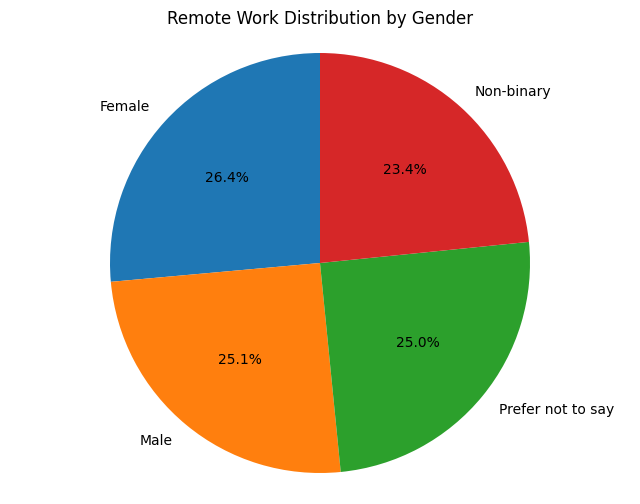

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Count the number of remote workers by gender
remote_work_counts = data[data['Work_Location'] == 'Remote']['Gender'].value_counts()

plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.pie(remote_work_counts, labels=remote_work_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')

plt.title('Remote Work Distribution by Gender')

plt.show()

<ipython-input-28-023446de503c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_by_role.values, y=experience_by_role.index, palette='viridis')


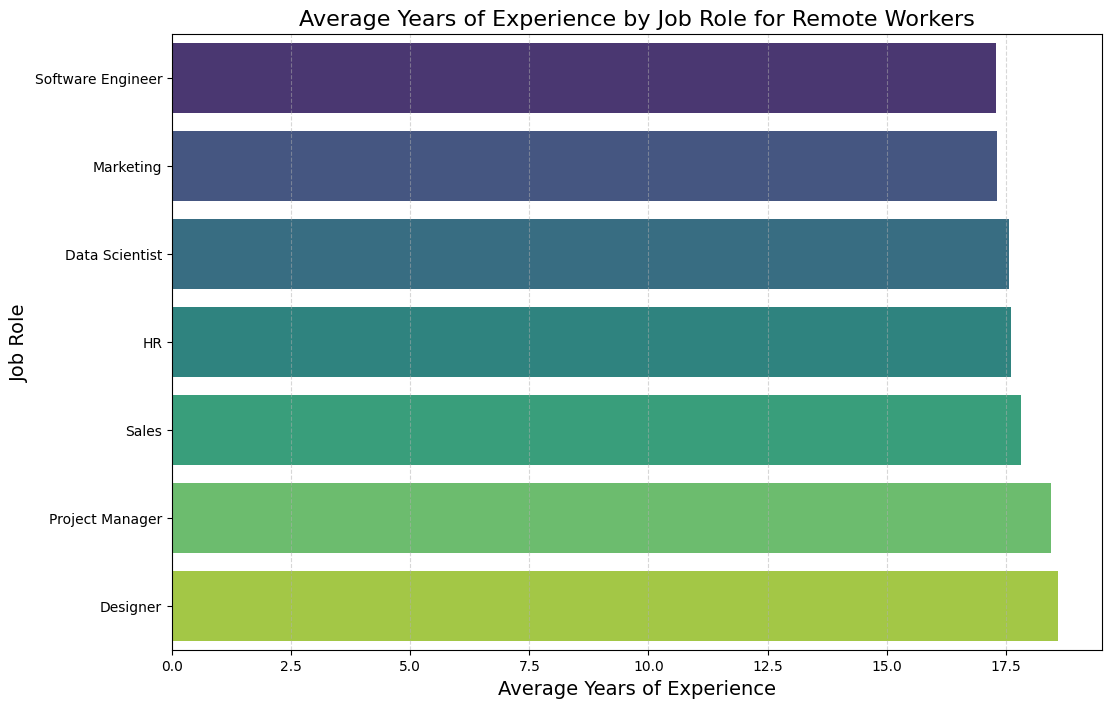

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

remote_work_data = df[df['work_location'] == 'remote']

experience_by_role = data.groupby('Job_Role')['Years_of_Experience'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=experience_by_role.values, y=experience_by_role.index, palette='viridis')
plt.title('Average Years of Experience by Job Role for Remote Workers', fontsize=16)
plt.xlabel('Average Years of Experience', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


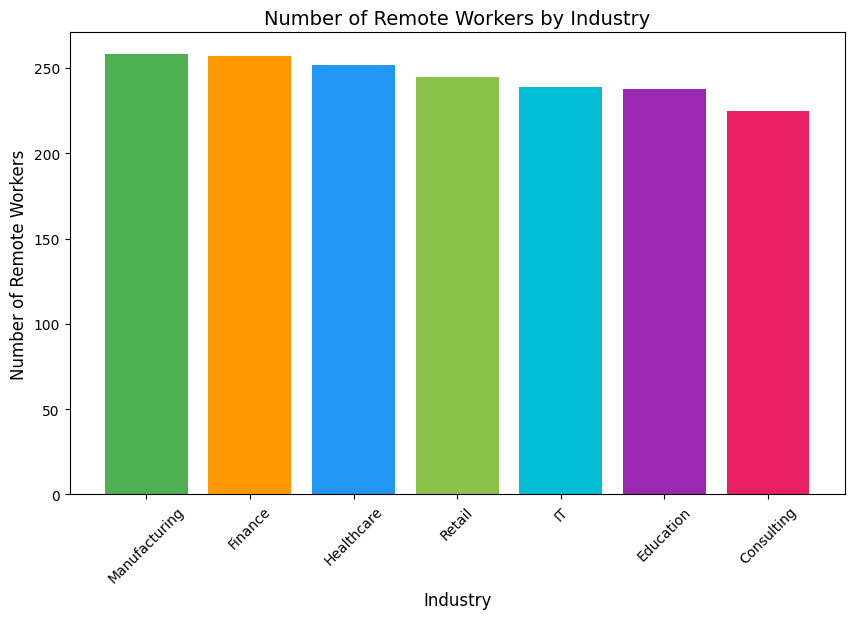

In [ ]:
import matplotlib.pyplot as plt

remote_worker_counts = data[data['Work_Location'] == 'Remote']['Industry'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(remote_worker_counts.index, remote_worker_counts.values,
        color=['#4CAF50', '#FF9800', '#2196F3', '#8BC34A', '#00BCD4', '#9C27B0', '#E91E63'])

plt.title('Number of Remote Workers by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Remote Workers', fontsize=12)
plt.xticks(rotation=45)

plt.show()


<ipython-input-30-87e5f25fa8ad>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_experience_counts = data.groupby(['Age_Group', 'Experience_Group']).size().unstack()


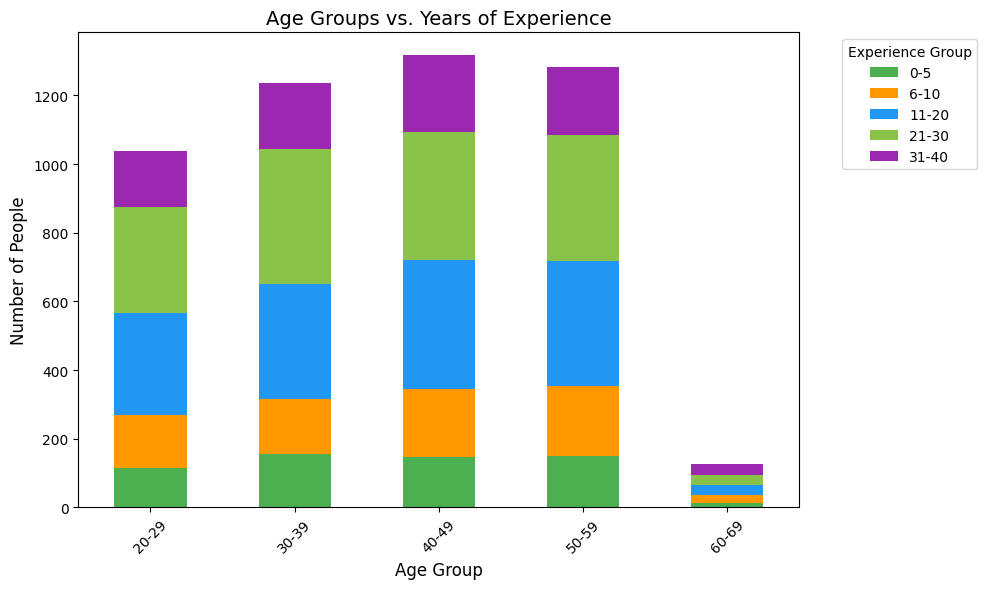

In [ ]:
# Categorize ages into groups
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Categorize years of experience into groups
experience_bins = [0, 5, 10, 20, 30, 40]
experience_labels = ['0-5', '6-10', '11-20', '21-30', '31-40']
data['Experience_Group'] = pd.cut(data['Years_of_Experience'], bins=experience_bins, labels=experience_labels, right=False)

# Count the number of people in each age and experience group
age_experience_counts = data.groupby(['Age_Group', 'Experience_Group']).size().unstack()

# Plotting the grouped bar plot
age_experience_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#FF9800', '#2196F3', '#8BC34A', '#9C27B0'])
plt.title('Age Groups vs. Years of Experience', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Experience Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

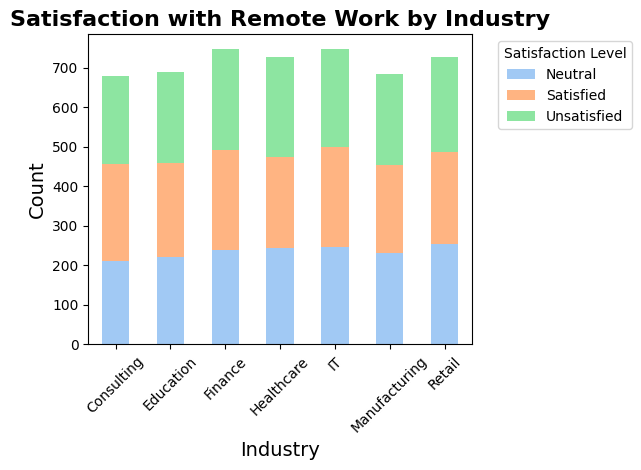

In [ ]:
satisfaction_by_industry = data.groupby('Industry')['Satisfaction_with_Remote_Work'].value_counts().unstack()

# Create a bar plot for satisfaction levels by industry
plt.figure(figsize=(12, 8))
satisfaction_by_industry.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
plt.title('Satisfaction with Remote Work by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

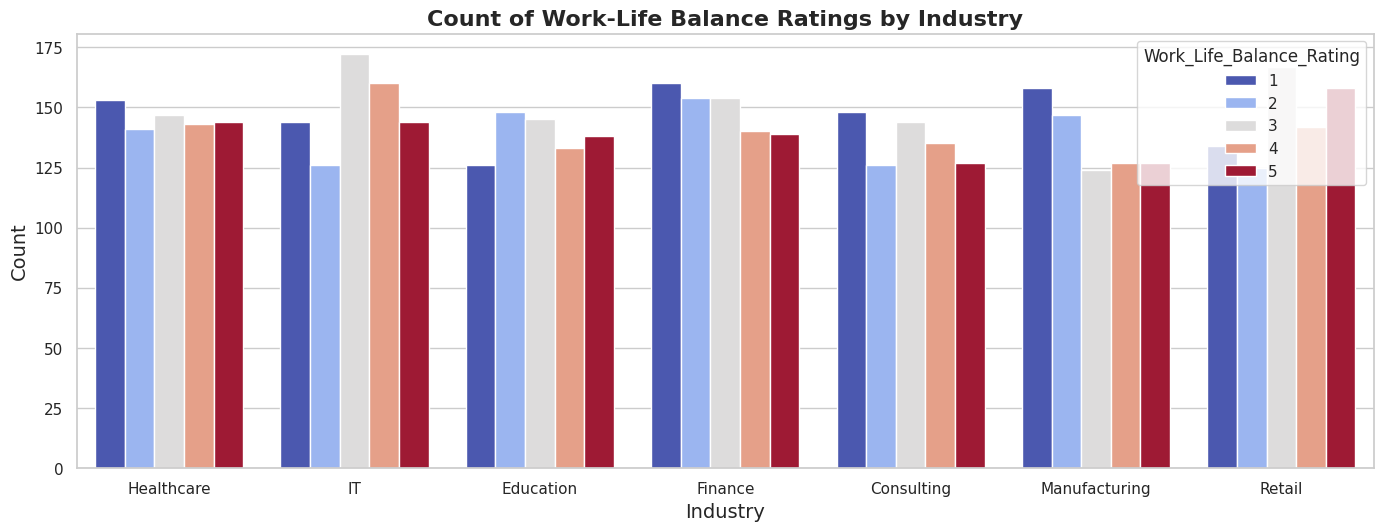

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 10))

# Count Plot for Work-Life Balance Rating by Industry
plt.subplot(2, 1, 1)
sns.countplot(x='Industry', hue='Work_Life_Balance_Rating', data=data, palette='coolwarm')
plt.title('Count of Work-Life Balance Ratings by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

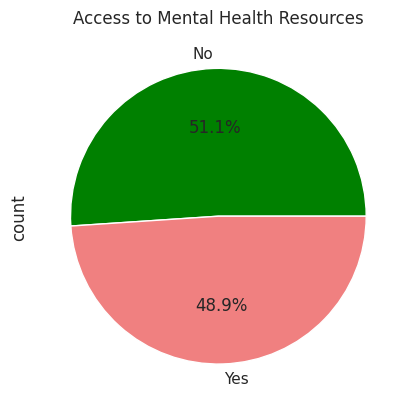

In [ ]:
data['Access_to_Mental_Health_Resources'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'lightcoral'])
plt.title('Access to Mental Health Resources')
plt.show()

<ipython-input-34-60e99702e423>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mental_Health_Condition'].fillna('Not Specified', inplace=True)
<ipython-input-34-60e99702e423>:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(y='Job_Role', hue='Mental_Health_Condition', data=data, palette=palette)


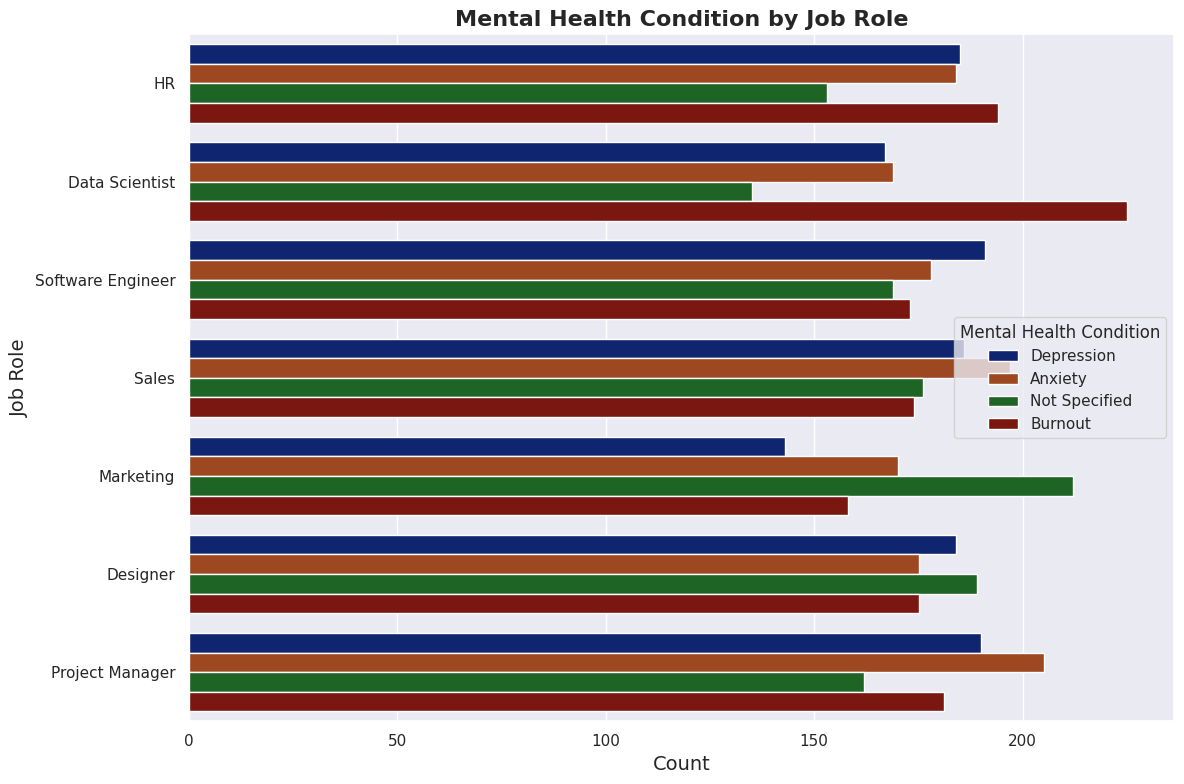

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data['Mental_Health_Condition'].fillna('Not Specified', inplace=True)
sns.set(style='darkgrid')
palette = sns.color_palette("dark", n_colors=5)

plt.figure(figsize=(12, 8))
sns.countplot(y='Job_Role', hue='Mental_Health_Condition', data=data, palette=palette)

plt.title('Mental Health Condition by Job Role', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Job Role', fontsize=14)

plt.legend(title='Mental Health Condition')

plt.tight_layout()

plt.show()


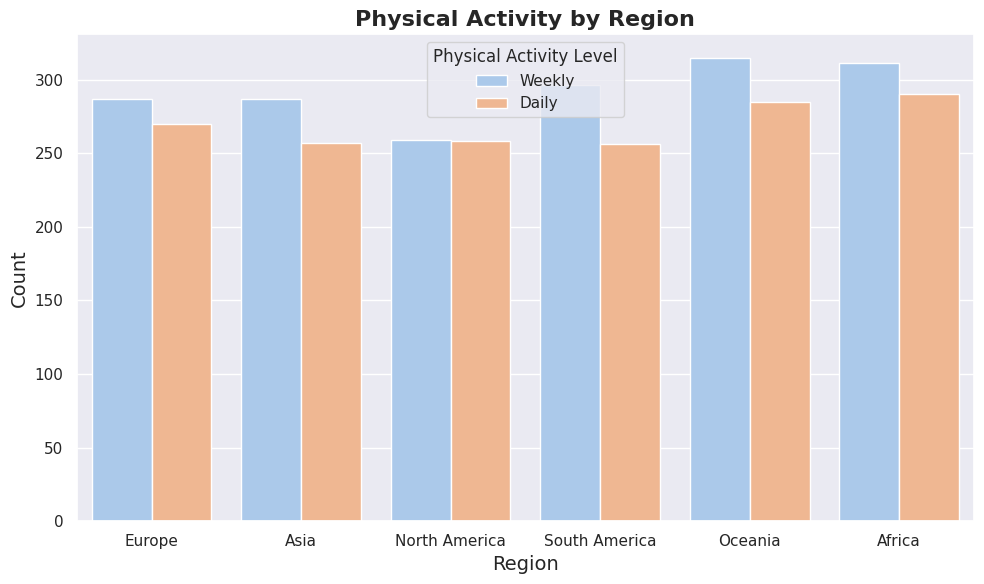

In [ ]:
# Set the style of seaborn
sns.set(style='darkgrid')

# Create the count plot for Physical Activity by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Physical_Activity', data=data, palette='pastel')
plt.title('Physical Activity by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Physical Activity Level')
plt.tight_layout()
plt.show()

**11. MODEL TRAINING:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

features = ['Age', 'Years_of_Experience', 'Work_Location', 'Gender', 'Job_Role']
target = 'Stress_Level'

categorical_features = ['Work_Location', 'Gender', 'Job_Role']
numerical_features = ['Age', 'Years_of_Experience']

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

        High       0.50      1.00      0.67         1
         Low       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Accuracy Score:
0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


At age 25, the hours worked are 40. At age 30, the hours worked increase to 45. At age 35, the hours drop to 38. At age 40, the hours increase to 50. At age 45, the hours increase again to 55.

Hours worked per week generally increase with age, particularly after age 35, despite a temporary decrease at age 35.

SUMMARY:
The analysis shows that employees aged 25-34 and 45-54 are more likely to work remotely, and there is a clear link between work location and stress levels. Remote employees often feel more stress due to issues like social isolation and work-life balance, although some find remote work less stressful. Industries such as Finance, IT, and Healthcare are leading in remote work, often filled by experienced professionals in roles like Project Managers, Designers, and HR. Stress levels vary significantly across different work arrangements, highlighting how the work environment affects employee well-being. Additionally, work hours generally increase with age, especially after 35, even though there is a temporary dip at that age.



INSIGHTS:

Age and Remote Work: Younger (25-34) and older (45-54) age groups are more involved in remote work.

Stress Levels: There is a positive relationship between remote work and stress, with remote workers reporting higher stress levels.

Industry Trends: Finance, IT, and Healthcare are the top sectors adopting remote work, showing a shift toward flexible working arrangements.

Work Hours: Work hours tend to increase with age, especially after 35, indicating greater responsibility among older employees.

Job Roles and Experience: More experienced employees tend to work in remote roles, suggesting that industry experience influences remote work opportunities.

These findings highlight the importance of considering employees' mental health and well-being when understanding remote work arrangements.